In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,chi2
from numpy import pi
from scipy.stats import norm, kstest
np.random.seed(42)

In [80]:
def normal_generator():
    val = np.random.normal()
    return val

#expected_frequency = np.array([norm.cdf(bins[0])])


import numpy as np
from scipy.stats import norm, chi2

def chi_squared_test(num_list, bins=False):
    if bins:
        bin_edges = norm.ppf(np.linspace(0, 1, bins + 1), loc=0, scale=1)
        plot = np.histogram(num_list, bins=bin_edges)
    
    frequency = plot[0]
    bin_edges = plot[1]
    
    expected_frequency = np.array([
        norm.cdf(bin_edges[i+1], loc=0, scale=1) - norm.cdf(bin_edges[i], loc=0, scale=1)
        for i in range(len(bin_edges) - 1)
    ]) * len(num_list)
    
    chi_squared = np.sum((frequency - expected_frequency)**2 / expected_frequency)

    df = len(bin_edges) - 1 - 2

    p_value = 1 - chi2.cdf(chi_squared, df)
    
    return chi_squared, df, p_value,bin_edges


Normal chi-squared fit: 5.400, P-value for Normal: 0.714
Shifted chi-squared fit: 6.200, P-value for Shift: 0.625
Bin edges: ['-inf', '-1.282', '-0.842', '-0.524', '-0.253', '0.000', '0.253', '0.524', '0.842', '1.282', 'inf']


c:\Users\Asus\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:7037: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


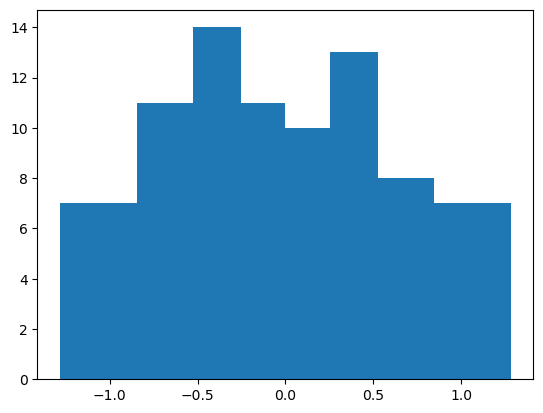

In [81]:

num_list = np.random.normal(size =100,scale = 1)
bins = np.linspace(-20,20,10)

#plt.hist(num_list,bins = bins)
shifted_num_list = num_list + 0.01



chi_norm,_,p_value_norm,bins = chi_squared_test(num_list,bins = 10)
chi_shift,_,p_value_shift,_ = chi_squared_test(shifted_num_list,bins = 10)

# print("Normal chi squared fit: ", chi_norm,"P_value for Normal",p_value_norm)

# print("shifted chi squared fit: ", chi_shift,"P_value for shift",p_value_shift)

# plot = plt.hist(num_list,bins =bins)
# print('Bin edges:',plot[1])
# Example formatted outputs for chi-squared test results
print(f"Normal chi-squared fit: {chi_norm:.3f}, P-value for Normal: {p_value_norm:.3f}")
print(f"Shifted chi-squared fit: {chi_shift:.3f}, P-value for Shift: {p_value_shift:.3f}")

# Plot histogram
plot = plt.hist(num_list, bins=bins)
print('Bin edges:', [f"{edge:.3f}" for edge in plot[1]])


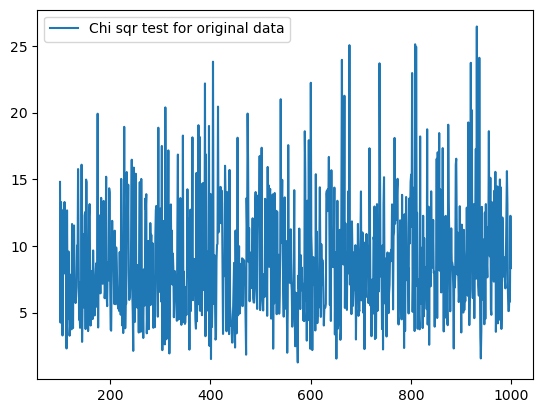

In [82]:
num_trials = range(100,1000)
chi_norm_values = []
p_value_norm_values = []
chi_shift_values = []
p_value_shift_values = []

for i in num_trials:
    num_list = np.random.normal(size= i)
    shifted_num_list = num_list + 0.1

    chi_norm, _, p_value_norm,_ = chi_squared_test(num_list,bins = 10)
    chi_shift, _, p_value_shift,_ = chi_squared_test(shifted_num_list,bins = 10)

    chi_norm_values.append(chi_norm)
    p_value_norm_values.append(p_value_norm)
    # chi_shift_values.append(chi_shift)
    # p_value_shift_values.append(p_value_shift)

plt.plot(num_trials,chi_norm_values,label = "Chi sqr test for original data")
#plt.plot(num_trials,p_value_shift_values,label = "P-value from Chi sqr test for shifted data")
plt.legend()




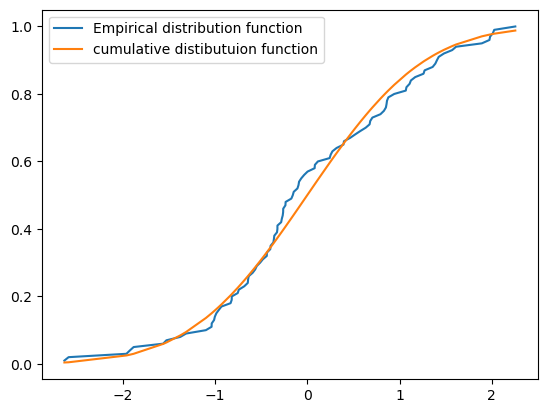

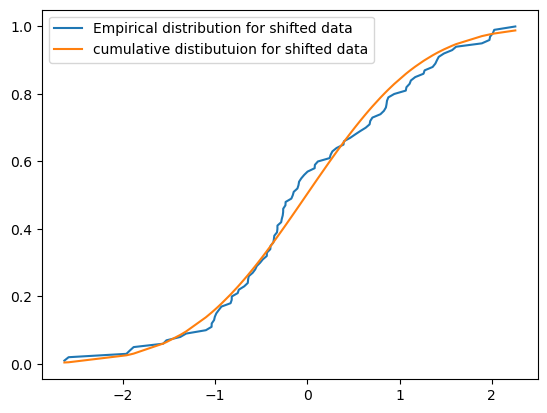

In [83]:
def empirical_distribution(data):
    sorted_data = np.sort(data)
    n = len(data)
    edf = np.arange(1, n + 1) / n
    return sorted_data, edf

\
num_list = np.random.normal(size=100, scale=1)
num_list,edf = empirical_distribution(num_list)

num_list_shf = num_list+0.01
num_list_shf,edf_shf = empirical_distribution(num_list_shf)

cdf = norm.cdf(num_list,loc = 0,)
cdf_shifted = norm.cdf(num_list_shf,loc = 0)

plt.plot(num_list,edf, label ="Empirical distribution function")
plt.plot(num_list,cdf,label ="cumulative distibutuion function")

plt.legend()
plt.show()

plt.plot(num_list,edf_shf,label ="Empirical distribution for shifted data")
plt.plot(num_list,cdf_shifted,label ="cumulative distibutuion for shifted data")


plt.legend()



[0.9084105017744525, 0.8733507333251188, 0.9922446607478869, 0.9986732420823355, 0.8841197881217391, 0.8438477966342577, 0.857582843469785, 0.5164314470148044, 0.9726425104048632, 0.993030219765994]


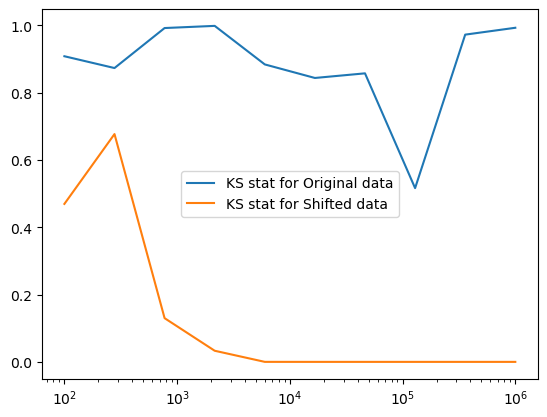

In [ ]:
KS_stat = []
KS_stat_shf = []
num_points = np.logspace(2,6,num = 10)


for i in num_points:

    num_list = np.random.normal(size=int(i))
    num_list,edf = empirical_distribution(num_list)

    num_list_shf = num_list+ 0.1
    num_list_shf,edf_shf = empirical_distribution(num_list_shf)

    cdf = norm.cdf(num_list,loc = 0)
    cdf_shifted = norm.cdf(num_list_shf,loc = 0)

    KS_stat.append(kstest(edf,cdf)[1])
    KS_stat_shf.append(kstest(cdf_shifted,edf_shf)[1])
print(KS_stat)
plt.semilogx(num_points,KS_stat,label="P value from KS stat for Original data")
plt.semilogx(num_points,KS_stat_shf,label="P value from KS stat for Shifted data")
plt.legend()

    

    #print("KS_stat:",KS_stat, "KS_Stat for shifted:",KS_stat_shf)

In [85]:
def generate_x():

    uniform_probability = np.random.uniform()

    if uniform_probability < 0.99:
        return np.random.normal()
    else :
        return np.random.normal()*500

def x_list(size=1):
    val = np.array([generate_x() for i in range(size)])
    return val

Chi_stat: 6.000000000000004 dof: 8 P_value 0.6472318887822308
P value Observerd from KS_Stat : 0.7869297884777761


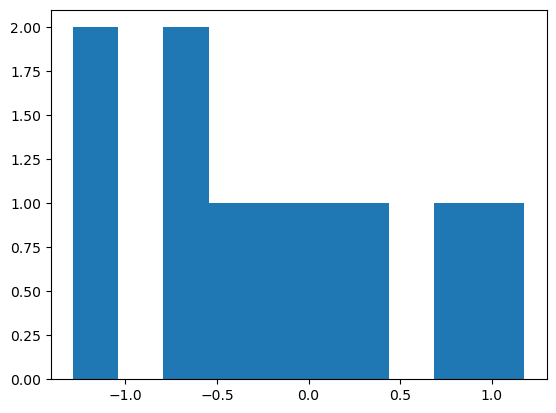

In [8]:

x = x_list(size = 10)

Chi_stat,dof,pvalue,bins = chi_squared_test(x,bins = 10)

#plt.hist(x,bins = bins)
print('Chi_stat:',Chi_stat,"dof:",dof,'P_value',pvalue)

plt.hist(x)

x,edf = empirical_distribution(x)

cdf = norm.cdf(x,loc = 0)

KS_stat = kstest(cdf,edf)

print("P value Observerd from KS_Stat :",KS_stat[1])


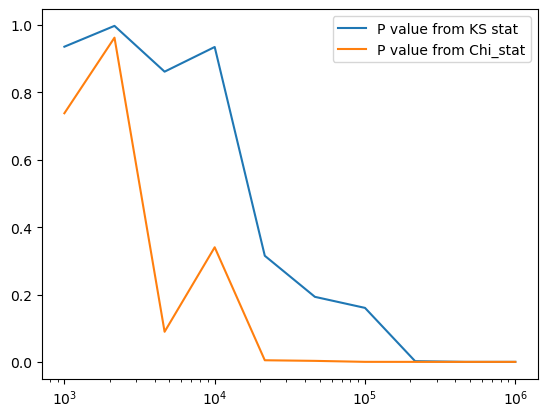

In [70]:
KS_stat = []
chi_stat = []
num_points = np.logspace(3, 6,num=10)

# print(num_points)


for i in num_points:

    num_list = x_list(size =int(i))
    num_list,edf = empirical_distribution(num_list)

    Chi_stat,dof,pvalue,bins = chi_squared_test(num_list,bins = 10)

    cdf = norm.cdf(num_list,loc = 0)

    KS_stat.append(kstest(cdf,edf)[1])
    chi_stat.append(pvalue)

plt.semilogx(num_points,KS_stat,label="P value from KS stat")
plt.semilogx(num_points,chi_stat,label = "P value from Chi_stat")
plt.legend()
plt.show()



In [14]:
def f(X,Y):
    a = pi*np.sin(10*(np.sqrt(X**2+Y**2)-0.5))
    # a = pi * np.sin(10 * (np.sqrt(X**2 + Y**2) - 0.5))
    u = np.cos(a) * X + np.sin(a) * Y - 0.5
    v = -np.sin(a) * X + np.cos(a) * Y - 0.5
    val = u**2 + v**2
    return val

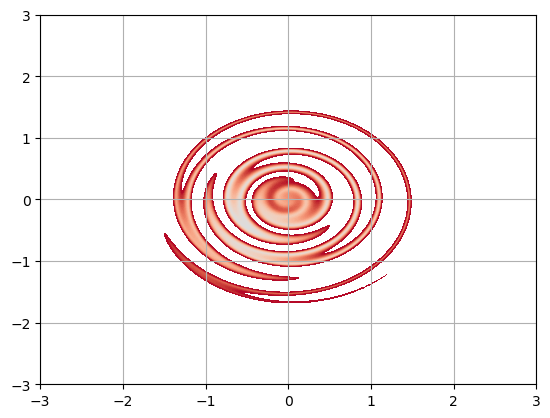

In [44]:
x_feature = np.linspace(-3,3,500)
y_feature = np.linspace(-3,3,500)

X,Y = np.meshgrid(x_feature,y_feature)
Z = f(X,Y)

mask = np.abs(Z)<1
# plt.scatter(X[mask],Y[mask])
# plt.show()


x_ell = np.max(np.abs(X[mask]))
y_ell = np.max(np.abs(Y[mask]))

  
t = np.linspace(0, 2 * np.pi, 1000)  # Angle parameter



contour = plt.contourf(X,Y,Z,cmap ="coolwarm",levels=np.linspace(-1, 1, 100))


plt.plot(x_ell, y_ell, label="Ellipse Border", color='black', linewidth=2)
plt.grid()

#plt.contour(X,Y,Z,levels = [-1,0,1],colors = "black")






In [ ]:
def montecarlo(j,k) :

    x_feature = np.linspace(-3,3,500)
    y_feature = np.linspace(-3,3,500)

    X,Y = np.meshgrid(x_feature,y_feature)
    Z = j(X,Y)


    X_cut = X[np.abs(Z)<1]
    Y_cut = Y[np.abs(Z)<1]
    x_ell = np.max(np.abs(X_cut))+0.5
    y_ell = np.max(np.abs(Y_cut))+0.5

    print("borders",x_ell,y_ell)

    monte_x = np.random.uniform(-x_ell,x_ell,k)
    monte_y = np.random.uniform(-y_ell,y_ell,k)



    monte_z = f(monte_x,monte_y)
    
    mask = np.abs(monte_z)<1 
    z_in = monte_z[mask]
    X_in = monte_x[mask]
    Y_in = monte_y[mask]



    prob = len(z_in)/len(monte_z)
    area = prob*(2*x_ell*2*y_ell)
    plt.scatter(monte_x,monte_y)
    plt.scatter(X_in,Y_in) 

    print("Probability: ",prob)
    print("Area", area)
    
    return area

montecarlo(f,10**6)
        

borders 1.996993987975952 2.1773547094188377
Probability:  0.180897
Area 3.1462794837490615


0.180897

In [ ]:
|